# Part 1

In [1]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
import time

In [2]:
# Define a sigmoid activation function. Can also be used from library. This is a simple definition.
def sigmoid_activation(x):
    return x / (1.0 + np.exp(-x))

In [3]:
def init_random_params(layer_sizes):
    rs=npr.RandomState(0)
#Define a list of (weights, biases tuples, one for each layer. We will use a single hidden layer network."
    return [(rs.randn(insize, outsize),   # weight matrix
             rs.randn(outsize))           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]
# The above line will run the for loop from insize to outsize, and will store the values
# layer_sizes[:-1] fills the weight matrix
# layer_sizes[1:] fills the bias array

In [4]:
# Define function y based on neural networks. Outputs are linearly related to biases and weights.
# Outputs of one layer are used as inputs to another layer via activation function.
def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = sigmoid_activation(outputs)
    return outputs

With 5 neurons in the hidden layer

In [5]:
# Make an initial guess of params:
params = init_random_params(layer_sizes=[1, 5, 1])
# Note that we are using a single hidden layer network. There is only one input and one output.
type(params)
print(params)
#print(len(params[0]))

[(array([[1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799]]), array([-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])), (array([[0.14404357],
       [1.45427351],
       [0.76103773],
       [0.12167502],
       [0.44386323]]), array([0.33367433]))]


In [6]:
layer_sizes=[1, 5, 1]
print(layer_sizes[1:])

[5, 1]


In [7]:
dydx = elementwise_grad(y, 1) # this is the partial derivative of y with respect to inputs i.e. x

In [8]:
y0 = 1.0
x = np.linspace(-2, 2).reshape((-1, 1))

In [9]:
# Define the objective function.
def lossfunction(params,step):
    # The objective is to minimize i.e. tend to zero.
    # dydx = -2xy
#    ycall = y(params,inputs)
    zeq = dydx(params, x) - (-2*x*y(params, x))
    y0 = 1.0
    ic = y(params, 0) - y0 # For my solution i.e. a set of paramaters 'params' this condition should be satisfied
    # since this is the intial condition.
    # If I minimize zeq and ic together or in some combined form, I will get a set of 'params' that give me
    # solution of dy/dx
    # Let us setup the loss function as zeq + ic
    return np.mean(zeq**2 + ic**2)

In [10]:
def callback(params,step, g):
    if step % 100 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,lossfunction(params,step)))

In [11]:
#ODE solver for 8 nodes
# grad(losfunciton) = d J(theta) / d theta
params = adam(grad(lossfunction), params, callback=callback, step_size=0.1, num_iters=1000)

Iteration   0 lossfunction 103.27483172673229
Iteration 100 lossfunction 0.693346655945528
Iteration 200 lossfunction 0.34895307745189436
Iteration 300 lossfunction 0.11496627233273181
Iteration 400 lossfunction 0.05106086629403292
Iteration 500 lossfunction 0.027726326565094547
Iteration 600 lossfunction 0.01868086745205264
Iteration 700 lossfunction 0.015224233073384871
Iteration 800 lossfunction 0.013239401491148939
Iteration 900 lossfunction 0.011639100480307831


Text(0.5, 1.0, '5 neurons in hidden layer')

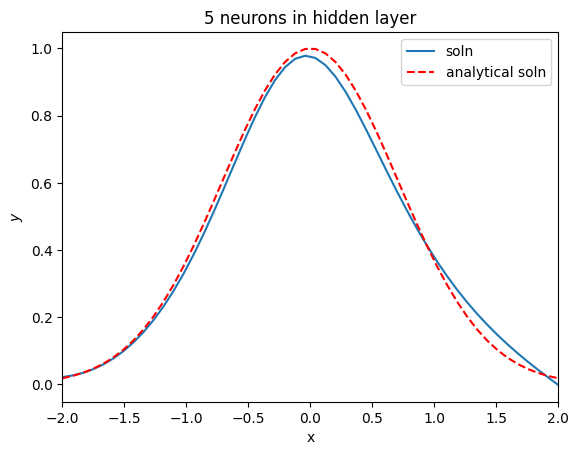

In [12]:
#Plot for 8 nodes
tfit = np.linspace(-2, 2).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln')
plt.plot(tfit,(np.exp(-tfit**2)), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([-2, 2])
plt.savefig('odenn.png')
plt.title('5 neurons in hidden layer')

For 10 neurons in the hidden layer

In [13]:
params = init_random_params(layer_sizes=[1, 10, 1])
type(params)
print(params)
layer_sizes=[1, 10, 1]
print(layer_sizes[1:])

[(array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ]]), array([ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])), (array([[-2.55298982],
       [ 0.6536186 ],
       [ 0.8644362 ],
       [-0.74216502],
       [ 2.26975462],
       [-1.45436567],
       [ 0.04575852],
       [-0.18718385],
       [ 1.53277921],
       [ 1.46935877]]), array([0.15494743]))]
[10, 1]


In [14]:
dydx = elementwise_grad(y, 1)
def lossfunction(params,step):

    zeq = dydx(params, x) - (-2*x*y(params, x))
    y0 = 1.0
    ic = y(params, 0) - y0

    return np.mean(zeq**2 + ic**2)


In [15]:
def callback(params,step, g):
    if step % 100 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,lossfunction(params,step)))


In [16]:
params = adam(grad(lossfunction), params, callback=callback, step_size=0.1, num_iters=1000)

Iteration   0 lossfunction 23.061263753151106
Iteration 100 lossfunction 0.0472225686883886
Iteration 200 lossfunction 0.0008825239664143592
Iteration 300 lossfunction 0.00032383551997147063
Iteration 400 lossfunction 0.0003199211987161195
Iteration 500 lossfunction 0.0003161046810751728
Iteration 600 lossfunction 0.0003121408870460835
Iteration 700 lossfunction 0.00030798152446380526
Iteration 800 lossfunction 0.00030358959116215986
Iteration 900 lossfunction 0.0002989469239336729


Text(0.5, 1.0, '10 neurons in hidden layer')

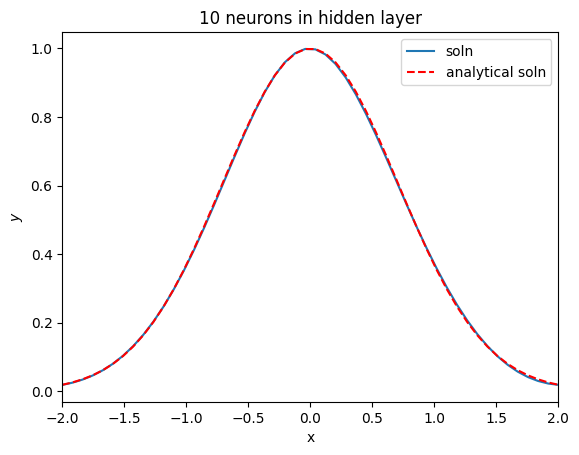

In [17]:
tfit = np.linspace(-2, 2).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln')
plt.plot(tfit,(np.exp(-tfit**2)), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([-2, 2])
plt.savefig('odenn.png')
plt.title('10 neurons in hidden layer')

Hidden layer with 15 neurons

In [18]:
params = init_random_params(layer_sizes=[1, 15, 1])
type(params)
print(params)
layer_sizes=[1, 15, 1]
print(layer_sizes[1:])

[(array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323]]), array([ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877])), (array([[ 0.15494743],
       [ 0.37816252],
       [-0.88778575],
       [-1.98079647],
       [-0.34791215],
       [ 0.15634897],
       [ 1.23029068],
       [ 1.20237985],
       [-0.38732682],
       [-0.30230275],
       [-1.04855297],
       [-1.42001794],
       [-1.70627019],
       [ 1.9507754 ],
       [-0.50965218]]), array([-0.4380743]))]
[15, 1]


In [19]:
dydx = elementwise_grad(y, 1)
def lossfunction(params,step):

    zeq = dydx(params, x) - (-2*x*y(params, x))
    y0 = 1.0
    ic = y(params, 0) - y0

    return np.mean(zeq**2 + ic**2)


In [20]:
def callback(params,step, g):
    if step % 100 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,lossfunction(params,step)))

In [21]:
params = adam(grad(lossfunction), params, callback=callback, step_size=0.1, num_iters=1000)

Iteration   0 lossfunction 379.66530536856686
Iteration 100 lossfunction 0.04014954778803302
Iteration 200 lossfunction 0.023424889320197755
Iteration 300 lossfunction 0.012729146204148365
Iteration 400 lossfunction 0.0066962197063216815
Iteration 500 lossfunction 0.003851414722533479
Iteration 600 lossfunction 0.002625910051785533
Iteration 700 lossfunction 0.002037560857132472
Iteration 800 lossfunction 0.0016705846143801099
Iteration 900 lossfunction 0.0013939285458893097


Text(0.5, 1.0, '15 neurons in hidden layer')

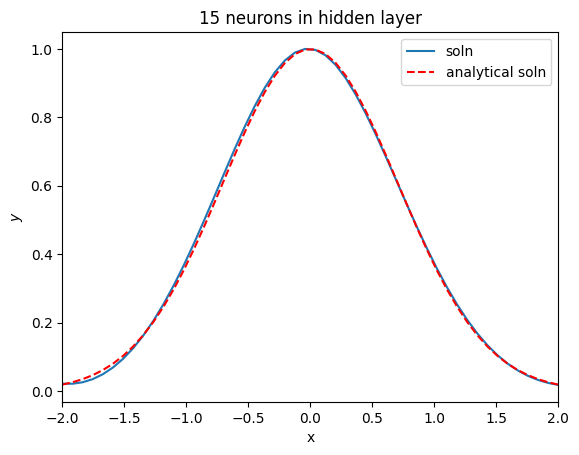

In [22]:
tfit = np.linspace(-2, 2).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln')
plt.plot(tfit,(np.exp(-tfit**2)), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([-2, 2])
plt.savefig('odenn.png')
plt.title('15 neurons in hidden layer')

# Observation
After analyzing the graphs corresponding to hidden layers with 5, 10, and 15 neurons, and comparing them with the actual graph provided in the tutorial, we can infer that increasing the number of neurons in the hidden layers tends to minimize the loss function. Consequently, the graph obtained from the analytical solution closely resembles the actual solution for hidden layers with 10 and 15 neurons. However, for the hidden layer with 5 neurons, the graph of the analytical solution deviates from the actual solution.

# Part 2

In [23]:
def sigmoid_activation(x):
    return x / (1.0 + np.exp(-x))

In [24]:
def init_random_params(layer_sizes):
    rs=npr.RandomState(0)
    return [(rs.randn(insize, outsize),   # weight matrix
             rs.randn(outsize))           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]


In [25]:
def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = sigmoid_activation(outputs)
    return outputs

In [26]:
params = init_random_params(layer_sizes=[1, 15, 1])
type(params)
print(params)
print(len(params[0]))

[(array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323]]), array([ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877])), (array([[ 0.15494743],
       [ 0.37816252],
       [-0.88778575],
       [-1.98079647],
       [-0.34791215],
       [ 0.15634897],
       [ 1.23029068],
       [ 1.20237985],
       [-0.38732682],
       [-0.30230275],
       [-1.04855297],
       [-1.42001794],
       [-1.70627019],
       [ 1.9507754 ],
       [-0.50965218]]), array([-0.4380743]))]
2


In [27]:
layer_sizes=[1, 15, 1]
print(layer_sizes[1:])

[15, 1]


In [28]:
dydx = elementwise_grad(y, 1)
y0 = 1.0
x = np.linspace(-2, 2).reshape((-1, 1))

In [29]:
def lossfunction(params,step):
    derivative = 2*x**3 - np.exp(-x)
    zeq = dydx(params, x) - derivative
    y0 = 1.0
    ic = y(params, 0) - y0
    return np.mean(zeq**2 + ic**2)

In [30]:
def callback(params,step, g):
    if step % 100 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,lossfunction(params,step)))



In [31]:
params = adam(grad(lossfunction), params, callback=callback, step_size=0.1, num_iters=1000)

Iteration   0 lossfunction 137.85711402080653
Iteration 100 lossfunction 0.32351230904793626
Iteration 200 lossfunction 0.05450825068187751
Iteration 300 lossfunction 0.024176948989526513
Iteration 400 lossfunction 0.015771666017002625
Iteration 500 lossfunction 0.0850279928415096
Iteration 600 lossfunction 0.008375234440596485
Iteration 700 lossfunction 0.027058622321888534
Iteration 800 lossfunction 0.005126583213205671
Iteration 900 lossfunction 0.03897197950460326


(-2.0, 2.0)

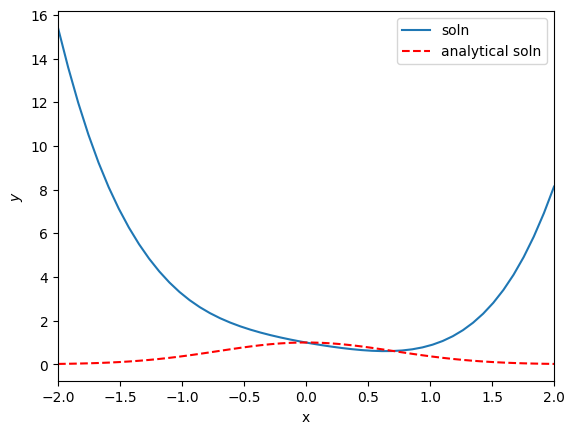

In [32]:
import matplotlib.pyplot as plt
tfit = np.linspace(-2, 2).reshape(-1, 1)
plt.plot(tfit, y(params, tfit), label='soln')
plt.plot(tfit,(np.exp(-tfit**2)), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([-2, 2])